# The Basics : Training Your First Neural Network

1. We will use Tensorflow
2. Keras is integrated into tf
3. Train with the given data 
4. Improve the model with added data



In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.9.2'

Importing the necessay libraries

In [ ]:
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## Setting up training data

As we saw before, supervised Machine Learning is all about figuring out an algorithm given a set of inputs and outputs.
Since the task in this codelab is to create a model that can give the temperature in Fahrenheit.

In [ ]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38,65,24,77],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100,149,75.2,170.6],  dtype=float)
for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))



-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit
65.0 degrees Celsius = 149.0 degrees Fahrenheit
24.0 degrees Celsius = 75.2 degrees Fahrenheit
77.0 degrees Celsius = 170.6 degrees Fahrenheit


Machine Learning Terminology Feature - The input(s) to our model. In this case, a single value -- the degrees in celsius.

Labels - The Output our model predicts. In this case, a single value --the degrees in Fahrenheit.

Example - A pair of input/outputs used during training. In our case a pair of values from celsius_q and farenheit_a at a specific index such as (22.72)

Machine Learning Terminology Feature - 

## Create the model

Next, create the model. We will use the simplest possible model we can ,a Dense network. Since the problem is straightforward, this network will require only a single layer, with a single neuron.

### Build a layer

We'll call the layer 'l0' and create it by instantiating tf.keras.layers.Dense' with the following configuration.

* 'input_shape= = [1]' - This specifies that the input to this layer is a single valye. That is, the shape is a one - dimensional array with one member. Since this is the first layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing degrees celsius.

* 'units = 1' - This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem. Since this is the final layer, it is also the size of the model's output - a single float value representing degrees Farenheit.(In a multi layered network, the size and shape of the layer would need to match the input_shape of the next layer)

In [ ]:
l0 = tf.keras.layers.Dense(units=1,input_shape=[1])

### Assemble layers into the model

Once layers are defined, they need to be assembled into a model.The Sequential model defination takes a list of layers as an argument, specifying the calculation order from the input to the output.

This model has just a single layer, l0.

In [ ]:
model = tf.keras.Sequential([l0])

## Compile the model, with loss and optimizer functions

Before training, the model has to be compiled. When compiled for training, the model is given:

* **Loss Function **- A way of measuringhow far off predictions are from the desired outcome is called the "loss".

* Optimizer function - A way of adjusting internal values in order to reduce the loss.

In [ ]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

These are used during training (model.fit(), below) to first caluculate the loss at each point, and then improve it.In fact,the act of calculating the current loss of a model and then improving it is precisely what training is.

During training, the optimizer function is used to calcualte adjustments to the model's internal variables.The goal is to adjust the internal vairables until the model mirrors the actual equation for converting celsius to Farenheit.

In [ ]:
history = model.fit(celsius_q,fahrenheit_a,epochs=1000,verbose=False)
print("Finished training the model")

Finished training the model


## Display training Statistics

The fit method returns a history object. We can use this object to plot how the loss of our model goes down after each epoch. A high loss means that the Farenheit degrees the model predicts is far from the corresponding value in farenheit_a.

We'll use MAtplotlib to visualise this, as you can see, our model improves very quickly at first, and then has a steady, slow improvement until it is very near "perfect" towards the end.

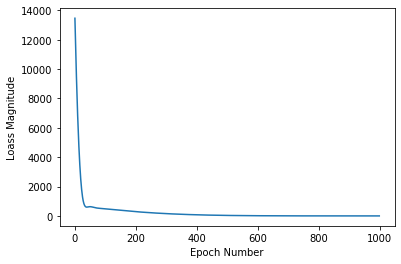

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel('Loass Magnitude')
plt.plot(history.history['loss']);

In [ ]:
print(model.predict([100.0]))

1/1 [==============================] - 0s 56ms/step
[[212.08795]]


## `Value i got is 212.087 which is highly close to 212`

## Looking at the layer weights



Finally,let's print the internal variables of the Dense Layer

In [ ]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[1.8049333]], dtype=float32), array([31.594624], dtype=float32)]


The first variable is close to 1.8 and the second to 32. These values(1.8 and 32) are the actual variables in the real conversion formula.

This is really close to the values in the conversion formula.

Dense layer works, but for a single neuron with a single input and a single output, the internal math looks the same as the equation for a line, y = mx +b, which has the same form as a conversion equation, f = 1.8c+32.

Since the form is the same, the variables should converge on the standard values of 1.8 and 32, which is exactly what happened.

With additional neurons, additional inputs, and outputs, the formula becomes much more complex, but the idea is the same.

A little experiment just for fun, what if we created more Dense layers with different units, which therefore also has more variables.

In [ ]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
1/1 [==============================] - 0s 62ms/step
[[211.94772]]
1/1 [==============================] - 0s 32ms/step
Model predicts that 100 degrees Celsius is: [[211.94772]] degrees Fahrenheit
These are the l0 variables: [array([[ 0.14770794,  0.37810543, -0.00752315,  0.58689326]],
      dtype=float32), array([3.563459 , 3.6307032, 3.5255346, 3.737646 ], dtype=float32)]
These are the l1 variables: [array([[ 1.1242515 ,  0.50850654, -0.5775379 ,  0.42675146],
       [ 0.79204535, -0.60266006,  0.25583062,  0.9564841 ],
       [ 0.6896102 ,  0.1864966 , -0.15182005, -0.2768271 ],
       [ 0.7240186 ,  0.12765138,  0.5596688 ,  0.5444887 ]],
      dtype=float32), array([ 3.5206232, -2.2063239,  3.4783168,  3.0498443], dtype=float32)]
These are the l2 variables: [array([[ 1.4017637 ],
       [-0.11175976],
       [ 0.3035033 ],
       [ 0.598325  ]], dtype=float32), array([3.3863897], dtype=float32)]


As you can see, this model is also able to predict the corresponding Farenheit value really well. But when you look at the variables(weights) in the l0 and l1 layers, they are nothing even close to  1.8 and 32. The added complexity hides the "simple" form of the conversion equation.